In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(suppress=True)
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Import dataset from Google Drive
# change dir to your project folder

from google.colab import drive
drive.mount('/content/gdrive')

root_path = '/content/gdrive/MyDrive/Colab Notebooks/DS Projects/HC ML Model/'
df_data = pd.read_csv(root_path+'healthcare_dataset.csv')


Mounted at /content/gdrive


In [3]:
df_data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
df_data['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [5]:
# Masking Data
df_data['Pat ID']=df_data.index
df_data = df_data.drop(['Name', 'Doctor', 'Hospital', 'Insurance Provider', 'Room Number', 'Admission Type', 'Date of Admission', 'Medication', 'Discharge Date'], axis=1)

In [6]:
df_data.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Test Results,Pat ID
0,30,Male,B-,Cancer,18856.281306,Normal,0
1,62,Male,A+,Obesity,33643.327287,Inconclusive,1
2,76,Female,A-,Obesity,27955.096079,Normal,2
3,28,Female,O+,Diabetes,37909.782410,Abnormal,3
4,43,Female,AB+,Cancer,14238.317814,Abnormal,4


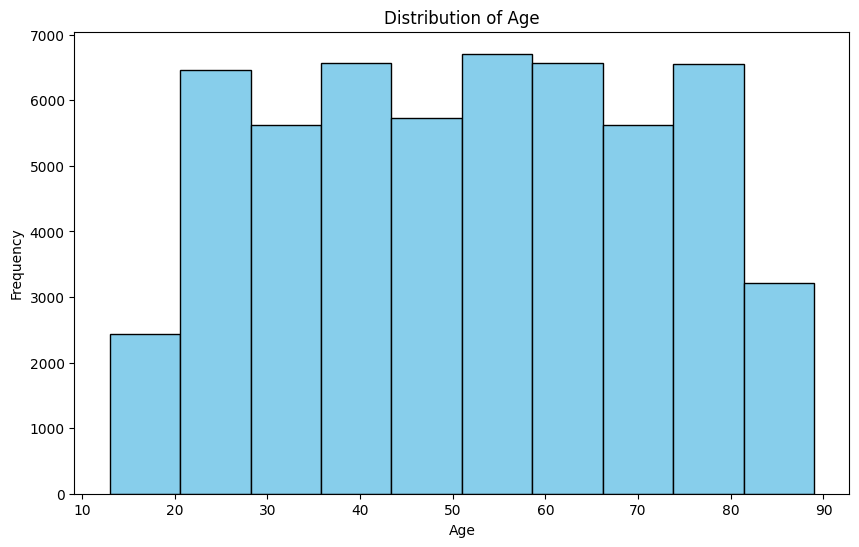

In [7]:
df = pd.DataFrame(df_data)

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

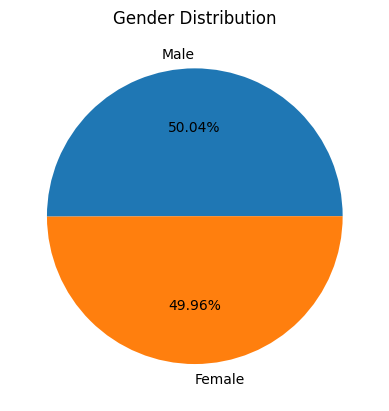

In [8]:
Male = df.loc[df['Gender'] == 'Male'].shape[0]
Female = df.loc[df['Gender'] == 'Female'].shape[0]
if pd.isna(Male):
    Male = 0
if pd.isna(Female):
    Female = 0
if Male == 0 and Female == 0:
    print("No data available for plotting.")
else:
    plt.pie([Male, Female], labels=['Male', 'Female'], autopct='%.2f%%')
    plt.title('Gender Distribution')
    plt.show()

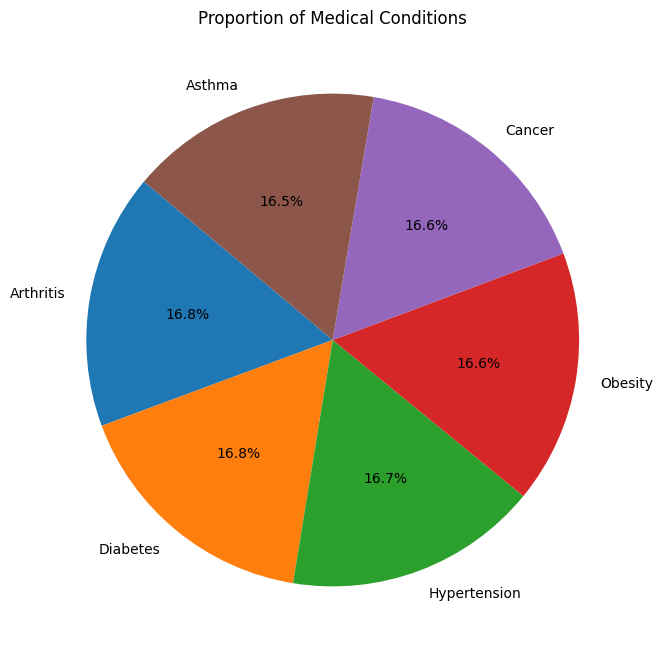

In [9]:
plt.figure(figsize=(8, 8))
df['Medical Condition'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Medical Conditions')
plt.ylabel('')
plt.show()

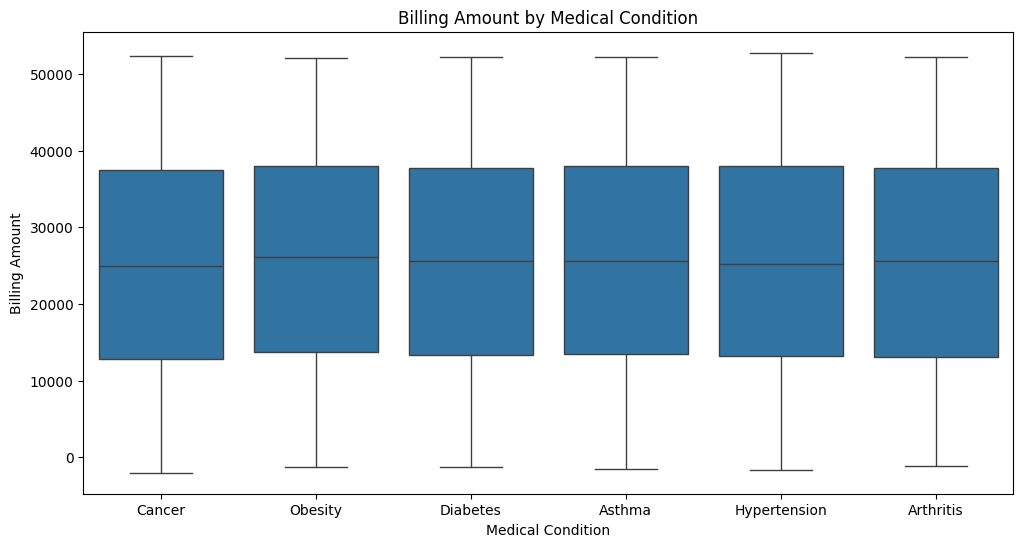

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=df)
plt.title('Billing Amount by Medical Condition')
plt.show()

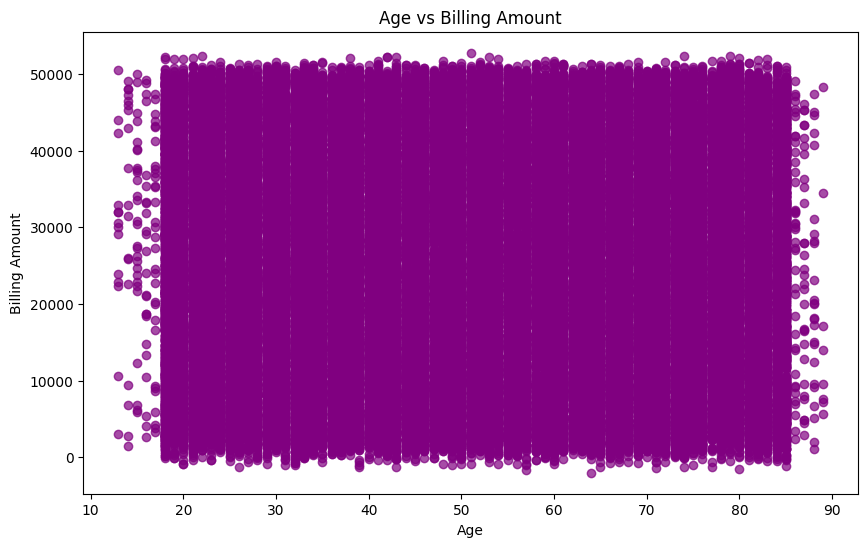

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Billing Amount'], alpha=0.7, color='purple')
plt.title('Age vs Billing Amount')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.show()

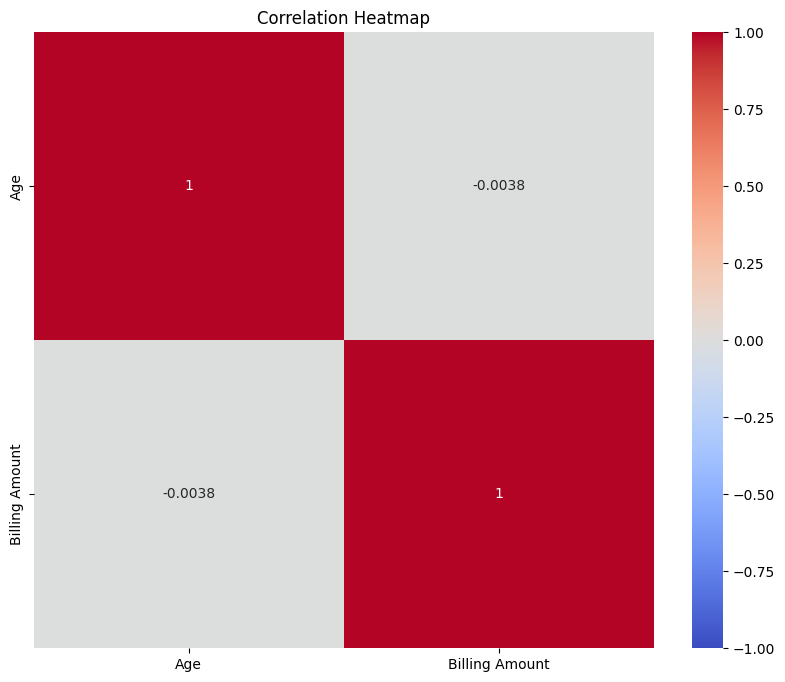

In [12]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Age', 'Billing Amount']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
df_data.shape

(55500, 7)

In [14]:
df_data.describe()

,Age,Billing Amount,Pat ID
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,27749.500000
std,19.602454,14211.454431,16021.614307
min,13.000000,-2008.492140,0.000000
25%,35.000000,13241.224652,13874.750000
50%,52.000000,25538.069376,27749.500000
75%,68.000000,37820.508436,41624.250000
max,89.000000,52764.276736,55499.000000


In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                55500 non-null  int64  
 1   Gender             55500 non-null  object 
 2   Blood Type         55500 non-null  object 
 3   Medical Condition  55500 non-null  object 
 4   Billing Amount     55500 non-null  float64
 5   Test Results       55500 non-null  object 
 6   Pat ID             55500 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 3.0+ MB


In [16]:
df_data.isnull().sum()

,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Billing Amount,0
Test Results,0
Pat ID,0


In [17]:
df_data.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Billing Amount',
       'Test Results', 'Pat ID'],
      dtype='object')

In [18]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [19]:
data = df_data

In [20]:
class MultiColumnLabelEncoder:

    def __init__(self, columns=None):
        self.columns = columns # array of column names to encode


    def fit(self, X, y=None):
        self.encoders = {}
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            self.encoders[col] = LabelEncoder().fit(X[col])
        return self


    def transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].transform(X[col])
        return output


    def fit_transform(self, X, y=None):
        return self.fit(X,y).transform(X)


    def inverse_transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].inverse_transform(X[col])
        return output

In [21]:
multi = MultiColumnLabelEncoder(columns=['Gender','Blood Type','Medical Condition','Test Results'])
data = multi.fit_transform(data)

In [22]:
data.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Test Results,Pat ID
0,30,1,5,2,18856.281306,2,0
1,62,1,0,5,33643.327287,1,1
2,76,0,1,5,27955.096079,2,2
3,28,0,6,3,37909.782410,0,3
4,43,0,2,2,14238.317814,0,4


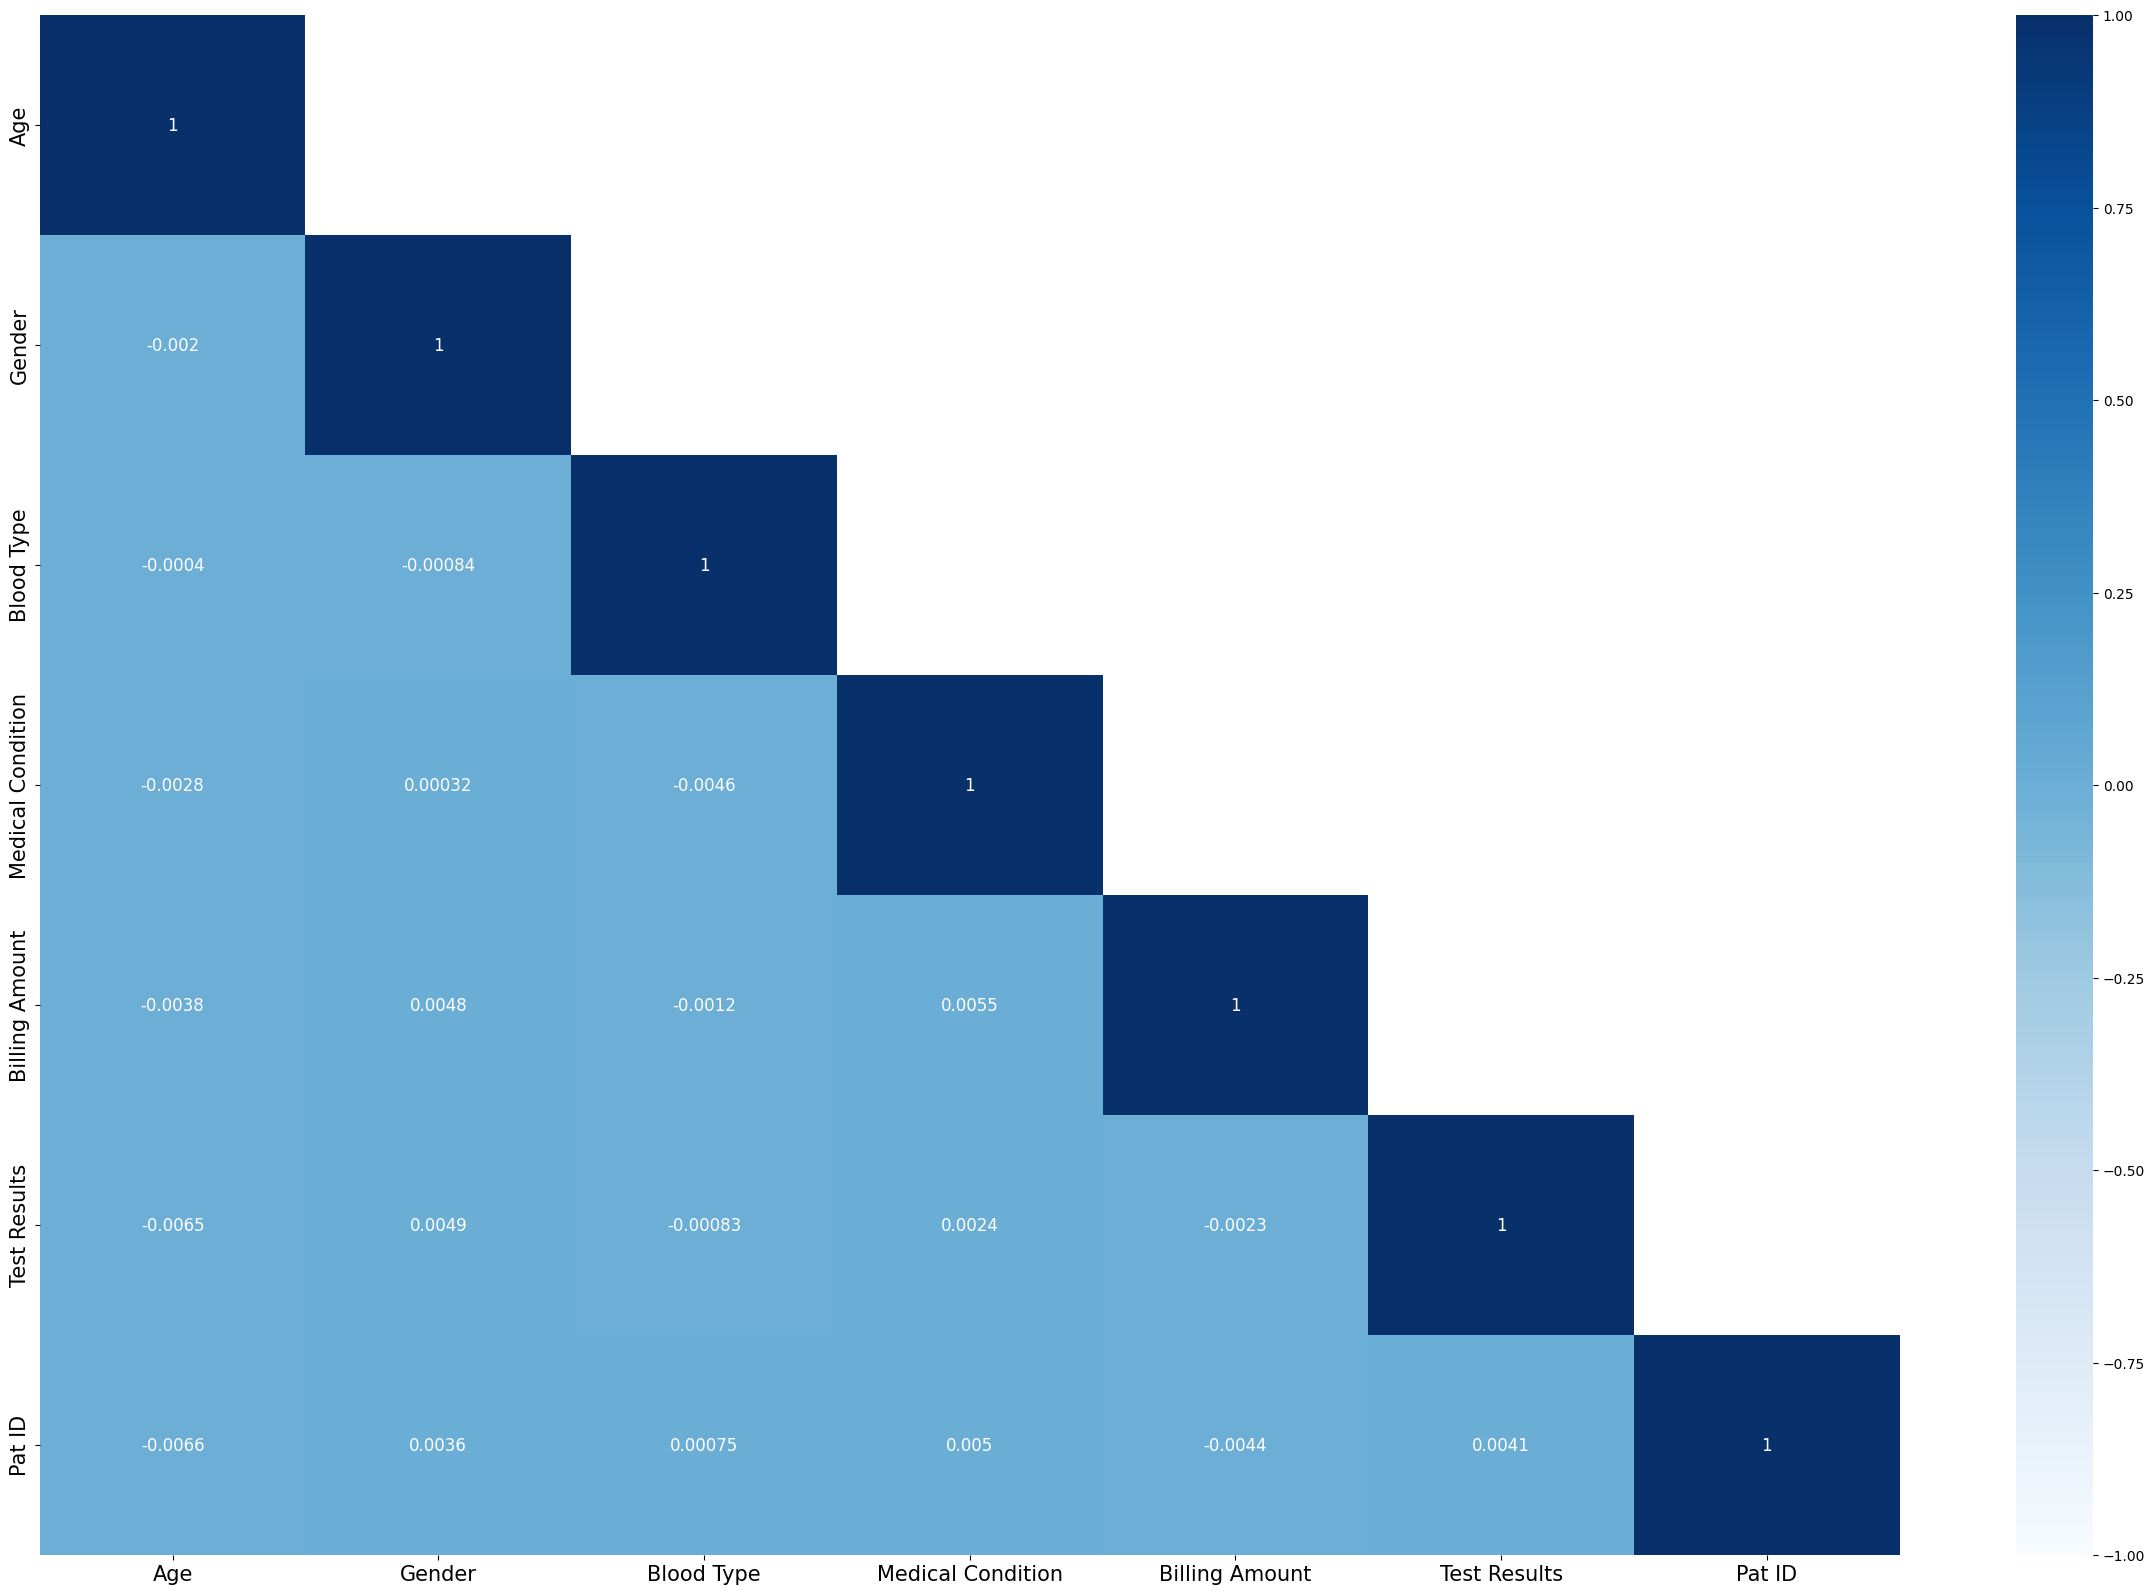

In [23]:
corrmat = data.corr()
plt.figure(figsize = (30,20))
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k = 1)] = True
sns.heatmap(corrmat, cmap = 'Blues', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [76]:
cols = ['Model','Accuracy Score']
results_tab = pd.DataFrame(columns = cols)
class classification_defs():

  def __init__(self, model):
      self.model = model

  def tablulate_results(self):
    cols = ['Model','Accuracy Score']
    result_tabulation = pd.DataFrame(columns = cols)
    results = pd.Series({
                    'Model': self.model,
                    'Accuracy Score': accuracy_score(Y_test, Y_pred)
                    })
    result_tabulation = result_tabulation.append(results , ignore_index = True)
    return result_tabulation

In [77]:
X = data[['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Billing Amount']]
Y = data[['Test Results']]

In [78]:
# Splitting data into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=33)

In [91]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
Model_Logistic = LogisticRegression(random_state = 0)
Model_Logistic.fit(X_train, Y_train)
Y_pred = Model_Logistic.predict(X_test)
Accu_Logictic = accuracy_score(Y_test, Y_pred)
print('Accuracy Score: ', Accu_Logictic)

Accuracy Score:  0.33315315315315314


In [92]:
# Decision Tree - Entropy
from sklearn import tree
Model_DT_E = tree.DecisionTreeClassifier(criterion="entropy")
Model_DT_E.fit(X_train, Y_train)
Y_pred = Model_DT_E.predict(X_test)
Accu_Decision = accuracy_score(Y_test, Y_pred)
print('Accuracy Score: ', Accu_Decision)

Accuracy Score:  0.3947747747747748


In [93]:
# Decision Tree - Gini
from sklearn import tree
Model_DT_G = tree.DecisionTreeClassifier(criterion="gini")
Model_DT_G.fit(X_train, Y_train)
Y_pred = Model_DT_G.predict(X_test)
Accu_Decision = accuracy_score(Y_test, Y_pred)
print('Accuracy Score: ', Accu_Decision)

Accuracy Score:  0.39036036036036037


In [94]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
Model_RF = RandomForestClassifier(random_state=0, n_jobs=-1)
Model_RF.fit(X_train,Y_train)
Y_pred = Model_RF.predict(X_test)
Accu_Decision = accuracy_score(Y_test, Y_pred)
print('Accuracy Score: ', Accu_Decision)

Accuracy Score:  0.388018018018018


In [95]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model_GNB = GaussianNB()
Model_GNB.fit(X_train,Y_train)
Y_pred = Model_GNB.predict(X_test)
Accu_Decision = accuracy_score(Y_test, Y_pred)
print('Accuracy Score: ', Accu_Decision)

Accuracy Score:  0.32963963963963966


In [96]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
Model_AdaB = AdaBoostClassifier(random_state=10)
Model_AdaB.fit(X_train, Y_train)
Y_pred = Model_AdaB.predict(X_test)
Accu_Decision = accuracy_score(Y_test, Y_pred)
print('Accuracy Score: ', Accu_Decision)

Accuracy Score:  0.32693693693693693


In [97]:
# Ensemble Model
from sklearn.ensemble import VotingClassifier
estimators=[('LR' ,Model_Logistic), ('DT_E',Model_DT_E), ('DT_G',Model_DT_G), ('RT',Model_RF),('AB',Model_AdaB),('GNB',Model_GNB)]
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, Y_train)
Y_pred = ensemble.predict(X_test)
Accu_Decision = accuracy_score(Y_test, Y_pred)
print('Accuracy Score: ', Accu_Decision)

Accuracy Score:  0.35306306306306307


In [98]:
# Best Model among all
model = Model_DT_E

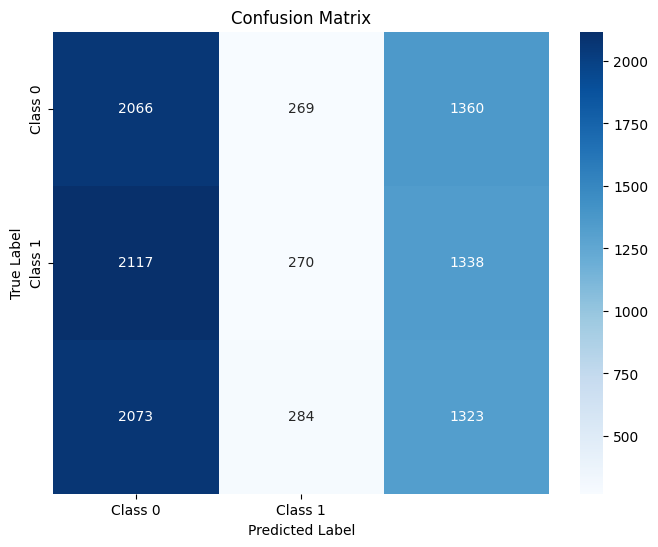

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
X_test.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount
8814,58,0,1,0,9847.650755
37214,74,0,2,0,29035.561479
22750,21,1,7,2,29574.629891
30726,66,1,3,3,39143.254493
15855,45,0,4,0,47637.234632


In [110]:
input_Age = 67
input_Gender = 'Male'
input_Blood_Type = 'A+'
input_Med_Cond = 'Cancer'
input_Billing_Amt = 20000

X_live = pd.DataFrame(columns=['Age', 'Gender', 'Blood Type','Medical Condition','Billing Amount'])

new_row = pd.DataFrame({'Age': [input_Age], 'Gender': [input_Gender], 'Blood Type': [input_Blood_Type], 'Medical Condition': [input_Med_Cond], 'Billing Amount': [input_Billing_Amt]})
X_live = pd.concat([X_live, new_row], ignore_index=True)

X_live

,Age,Gender,Blood Type,Medical Condition,Billing Amount
0,67,Male,A+,Cancer,20000


In [111]:
multi_1 = MultiColumnLabelEncoder(columns=['Gender','Blood Type','Medical Condition'])
X_live = multi_1.fit_transform(X_live)

In [112]:
X_live

,Age,Gender,Blood Type,Medical Condition,Billing Amount
0,67,0,0,0,20000


In [113]:
X_live1 = X_live
X_live1

,Age,Gender,Blood Type,Medical Condition,Billing Amount
0,67,0,0,0,20000


In [103]:
Y_live = model.predict(X_live)
print(Y_live)

[0]


In [104]:
X_live_Y = X_live

In [105]:
X_live_Y['Test Results'] = Y_live

In [106]:
X_live_Y

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Test Results
0,67,0,0,0,20000,0


In [107]:
Y_live_inv = multi.inverse_transform(X_live_Y)
print(Y_live_inv)

  Age  Gender Blood Type Medical Condition Billing Amount Test Results
0  67  Female         A+         Arthritis          20000     Abnormal


In [108]:
import pickle
# Save the model
filename = root_path+'model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [114]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_live1)
result[0]

0

In [115]:
X_live_Y = X_live
X_live_Y['Test Results'] = result

In [116]:
X_live_Y

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Test Results
0,67,0,0,0,20000,0


In [117]:
Y_live_inv = multi.inverse_transform(X_live_Y)
print(Y_live_inv)

  Age  Gender Blood Type Medical Condition Billing Amount Test Results
0  67  Female         A+         Arthritis          20000     Abnormal
